<a href="https://colab.research.google.com/github/pcmendes1973/WQU-Capstone/blob/main/yield_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolate Yield Curves for 2000-2023

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline


Download raw data obtained from treasury.gov from repository


In [41]:
price_data = pd.read_csv(
    "https://raw.githubusercontent.com/jfarrell8/WQU_5457/master/price_data.csv",
    index_col='Date'
)

yield_curves = pd.read_csv(
    "https://raw.githubusercontent.com/jfarrell8/WQU_5457/master/yield_curves.csv",
    index_col='Date'
)

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2000-01-03,NaN,NaN,5.48,NaN,5.81,6.09,6.38,6.42,6.50,6.65,6.58,6.94,6.61
2000-01-04,NaN,NaN,5.43,NaN,5.75,6.00,6.30,6.34,6.40,6.56,6.49,6.84,6.53
2000-01-05,NaN,NaN,5.44,NaN,5.74,6.05,6.38,6.43,6.51,6.68,6.62,6.95,6.64
2000-01-06,NaN,NaN,5.41,NaN,5.69,6.03,6.35,6.39,6.46,6.63,6.57,6.86,6.58
2000-01-07,NaN,NaN,5.38,NaN,5.66,6.00,6.31,6.35,6.42,6.58,6.52,6.82,6.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,5.54,5.52,5.44,5.45,5.31,4.82,4.31,4.04,3.87,3.92,3.90,4.21,4.05
2023-12-26,5.53,5.52,5.45,5.44,5.28,4.83,4.26,4.05,3.89,3.91,3.89,4.20,4.04
2023-12-27,5.55,5.53,5.44,5.42,5.26,4.79,4.20,3.97,3.78,3.81,3.79,4.10,3.95


Test parameters using the `CubicSpline` object of the `SciPy` interpolation library. Print sample interpolated curves from several dates to test the parameters.

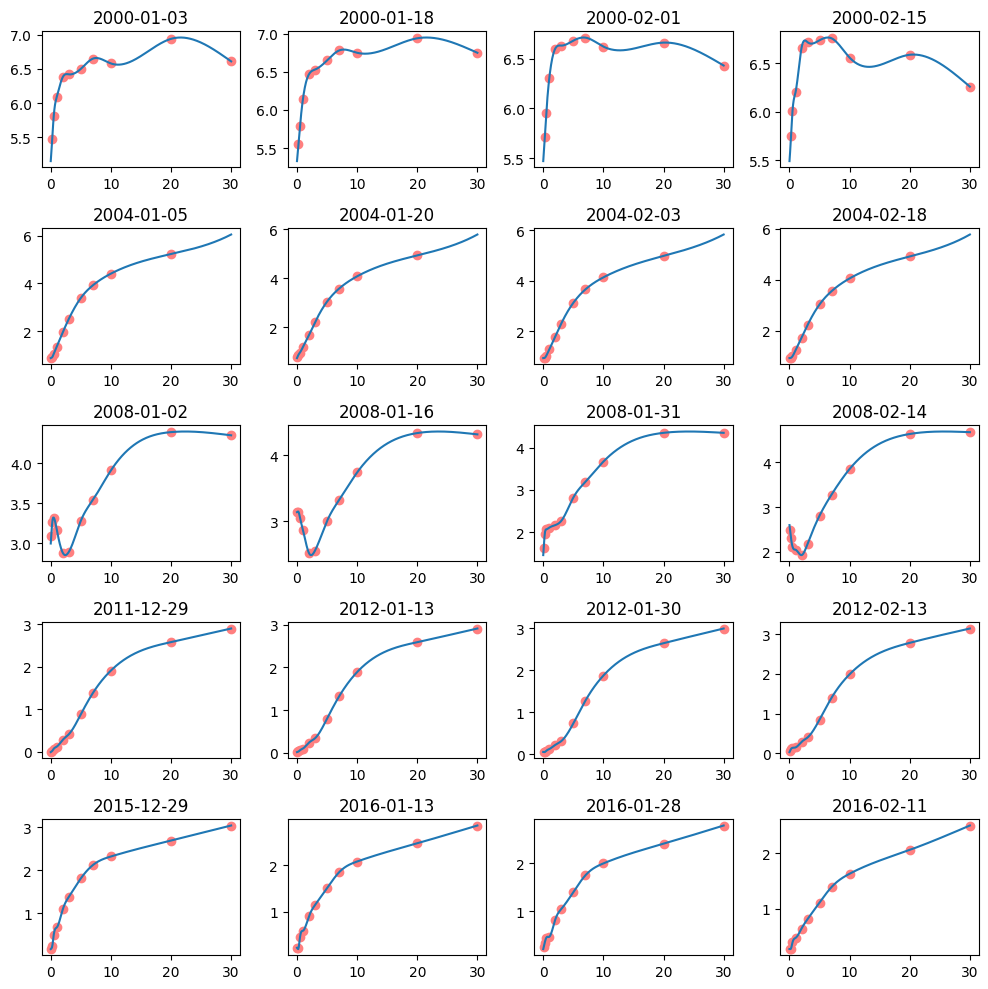

In [33]:
def compile_cubic_spline(lineno):

  points = [(i, row_value) for i, row_value in yield_curves.iloc[lineno].items() if not np.isnan(row_value)]
  x_points = [(int(i[:-3])/12 if i[-2:] == 'Mo' else int(i[:-3])) for i, j in points]
  y_points = [i[1] for i in points]

  return CubicSpline(x_points, y_points, bc_type='natural'), x_points, y_points

x_values = np.linspace(0, 30, 301)
fig, axes = plt.subplots(5, 4, figsize=(10, 10))

for i in range(5):
  for j in range(4):
    ax = axes[i, j]
    lineno = 1000 * i + 10 * j
    cs, x_points, y_points = compile_cubic_spline(lineno)
    ax.scatter(x_points, y_points, color='#ff7f7f')
    ax.plot(x_values, cs(x_values))
    ax.set_title(f'{yield_curves.iloc[lineno].name}')

plt.tight_layout()
plt.show()

Interpolate all curves and save them in a dataframe.

In [40]:
x_values = np.linspace(0, 30, 301)

interpolated_yield_curves = pd.DataFrame(
    index=yield_curves.index,
    columns=x_values)

for date, curve in yield_curves.iterrows():
  points = [(i, row_value) for i, row_value in curve.items() if not np.isnan(row_value)]
  x_points = [(int(i[:-3])/12 if i[-2:] == 'Mo' else int(i[:-3])) for i, j in points]
  y_points = [i[1] for i in points]
  f = CubicSpline(x_points, y_points)

  interpolated_yield_curves.loc[date, :] = f(x_values)

interpolated_yield_curves

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,29.1,29.2,29.3,29.4,29.5,29.6,29.7,29.8,29.9,30.0
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,4.922291,5.17755,5.3891,5.561792,5.700475,5.81,5.895217,5.960975,6.012125,6.053517,...,6.750397,6.736266,6.721776,6.706922,6.691703,6.676114,6.660152,6.643815,6.627098,6.61
2000-01-04,4.867504,5.127002,5.3396,5.5107,5.6457,5.75,5.829,5.888101,5.932701,5.968201,...,6.667458,6.653643,6.639471,6.624939,6.610043,6.594781,6.579148,6.563143,6.546761,6.53
2000-01-05,4.973201,5.183303,5.361667,5.511661,5.63665,5.74,5.825079,5.895251,5.953885,6.004346,...,6.77279,6.75943,6.745729,6.731683,6.717289,6.702545,6.687447,6.671992,6.656177,6.64
2000-01-06,5.017387,5.189831,5.341429,5.474066,5.589628,5.69,5.777067,5.852716,5.91883,5.977296,...,6.70254,6.690224,6.677589,6.664633,6.651354,6.637748,6.623812,6.609544,6.594941,6.58
2000-01-07,4.988813,5.160447,5.311566,5.443986,5.559525,5.66,5.747227,5.823024,5.889207,5.947593,...,6.671072,6.65891,6.646433,6.633636,6.620517,6.607074,6.593304,6.579203,6.56477,6.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,5.261928,5.552227,5.481868,5.443214,5.420992,5.31,5.192847,5.086122,4.988973,4.900549,...,4.13365,4.125268,4.116661,4.10783,4.098771,4.089483,4.079964,4.070211,4.060224,4.05
2023-12-26,5.291007,5.541872,5.488616,5.442919,5.397563,5.28,5.165419,5.066643,4.980157,4.902448,...,4.121611,4.113426,4.105024,4.096403,4.087563,4.078502,4.069216,4.059705,4.049967,4.04
2023-12-27,5.285579,5.561892,5.490392,5.425524,5.376019,5.26,5.144979,5.043017,4.951567,4.868078,...,4.031831,4.023639,4.015227,4.006591,3.997732,3.988646,3.979331,3.969787,3.96001,3.95
